if a machine is able to take some decision with or without beeng explicetly program then that machine is sade to be AI.|

Step in ML  
 * Collection the Data
 * Preparing The Data
 * Chossing the model 
 * Training the model
 * Evaluating the model
 * Improving the performance/ Parameter  Tuning
 * Report the performance/ Prediction 

Type Of ML  
* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning

Supervised Learning
* This method involves training a model on a labeled dataset, which means that each training            example is paired with an output

Unsupervised Learning  
* Unsupervised learning is a type of machine learning where the model is given unlabeled data (i.e. you don’t tell the model what the “correct answers” are). It must find structure, patterns, or features in the data on its own

Reinforcement Learning  
* Reinforcement Learning is a branch of machine learning where an agent learns how to act in an environment in order to maximize some cumulative reward signal over time. The agent doesn’t get explicit correct answers; instead it learns by trial and error.

Supervised Learning  
* Classification --> Categorical Response
* Regression --> Range / Continuous Response

Applications  
* Fraud Detection
* Parkinson Prediction
* Customer Churn
* Cancer Classification
* Stock Prediction

Unsupervised Learning  
* Clutering  -->  grouping; pattern and relationship in data
* Associstion -->  

Application  

* Customer Segmentation
* Anomaly Detection
* Recommendation Systems
* Image and Text Clustering
* Social Network Analysis 
* Astronomy and Climate Science

Logistic Regression  

P(y=1) = 1 / (1 + e ^ -(wx + b)) 
based on sigmoid function

where 
 * wx + b is a linear eq.

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression, LinearRegression
from sklearn.metrics import  accuracy_score
import matplotlib.pyplot as plt

In [3]:
data = {
  "study_Hours": [6,2,4],
  "attendence": [85,60,70],
  "Result": ["Pass", "Fail", "Pass"]
}
df = pd.DataFrame(data)
df

,study_Hours,attendence,Result
0,6,85,Pass
1,2,60,Fail
2,4,70,Pass


In [4]:
x = df[["study_Hours", "attendence"]]
y = df["Result"]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)


In [5]:
X_train

,study_Hours,attendence
2,4,70
1,2,60


In [6]:
X_test

,study_Hours,attendence
0,6,85


In [7]:
y_train

2    Pass
1    Fail
Name: Result, dtype: object

In [8]:
y_test

0    Pass
Name: Result, dtype: object

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : ", accuracy)

Accuracy :  1.0


In [11]:
new_predication = model.predict([[5,75]])
print("Prediction (1=pass, 0=Fail):", new_predication[0])

Prediction (1=pass, 0=Fail): Pass


/run/media/mahakal108/New Volume H/Skill's/Python/Data Science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [12]:
print("Predication Probability(Fail, Pass):", model.predict_proba([[5,75]]))

Predication Probability(Fail, Pass): [[0.00334684 0.99665316]]


/run/media/mahakal108/New Volume H/Skill's/Python/Data Science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [13]:
import seaborn as sns

In [14]:
t = sns.load_dataset("titanic")
t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
t['age'] = t.groupby('pclass')['age'].transform(lambda grp: grp.fillna(grp.mean()))

In [16]:
mapping = {
    "man": 1,
    "woman": 2,
    "child": 3
}

t["who"] = t["who"].map(mapping)
t["who"] = t["who"].fillna(0).astype(int)

In [17]:
mapping = {
    "Q": 1,
    "C": 2,
    "S": 3
}

t["embarked"] = t["embarked"].map(mapping)
t["embarked"] = t["embarked"].fillna(0).astype(int)

In [18]:
mapping = {
    "male": 1,
    "female": 2
    
}

t["sex"] = t["sex"].map(mapping)
t["sex"] = t["sex"].fillna(0).astype(int)

In [19]:
t.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [20]:
X = t[["pclass", "sex", "age", "sibsp", "parch",
    "fare", "embarked", "who",
    "adult_male", "alone"]]
y = t["survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=2)

In [21]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
161,2,2,40.000000,0,0,15.7500,3,2,False,True
869,3,1,4.000000,1,1,11.1333,3,3,False,False
518,2,2,36.000000,1,0,26.0000,3,2,False,False
117,2,1,29.000000,1,0,21.0000,3,1,True,False
576,2,2,34.000000,0,0,13.0000,3,2,False,True
...,...,...,...,...,...,...,...,...,...,...
534,3,2,30.000000,0,0,8.6625,3,2,False,True
584,3,1,25.140620,0,0,8.7125,2,1,True,True
493,1,1,71.000000,0,0,49.5042,2,1,True,True
527,1,1,38.233441,0,0,221.7792,3,1,True,True


In [22]:
X_test

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
707,1,1,42.00000,0,0,26.2875,3,1,True,True
37,3,1,21.00000,0,0,8.0500,3,1,True,True
615,2,2,24.00000,1,2,65.0000,3,2,False,False
169,3,1,28.00000,0,0,56.4958,3,1,True,True
68,3,2,17.00000,4,2,7.9250,3,2,False,False
...,...,...,...,...,...,...,...,...,...,...
512,1,1,36.00000,0,0,26.2875,3,1,True,True
440,2,2,45.00000,1,1,26.2500,3,2,False,False
123,2,2,32.50000,0,0,13.0000,3,2,False,True
682,3,1,20.00000,0,0,9.2250,3,1,True,True


In [23]:
y_train

161    1
869    1
518    1
117    0
576    1
      ..
534    0
584    0
493    0
527    0
168    0
Name: survived, Length: 534, dtype: int64

In [24]:
y_test

707    1
37     0
615    1
169    0
68     1
      ..
512    1
440    1
123    1
682    0
180    0
Name: survived, Length: 357, dtype: int64

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

/run/media/mahakal108/New Volume H/Skill's/Python/Data Science/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : ", accuracy)

Accuracy :  0.8179271708683473


In [27]:
# new_predication = model.predict([[22,175]])
# print("Prediction (1=pass, 0=Fail):", new_predication[0])

In [28]:
# print("Predication Probability(Fail, Pass):", model.predict_proba([[22,500]]))


Linear Regression

In [ ]:
data = {
  'Hours': [1,2,3,4,5],
  'Marks': [40,50,60,70,90]
}



In [33]:
df = pd.DataFrame(data)
df


,Hours,Marks
0,1,40
1,2,50
2,3,60
3,4,70
4,5,90


In [34]:
x = df[['Hours']]
y = df[['Marks']]

In [35]:
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
predicted_marks = model.predict([[6]])
print("Predicted Marks for 6 hours of Study:", predicted_marks)

Predicted Marks for 6 hours of Study: [[98.]]


/run/media/mahakal108/New Volume H/Skill's/Python/Data Science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
y_pred = model.predict(x)
accuracy = accuracy_score(y, y_pred)

print("Accuracy : ", accuracy)

Accuracy :  0.2


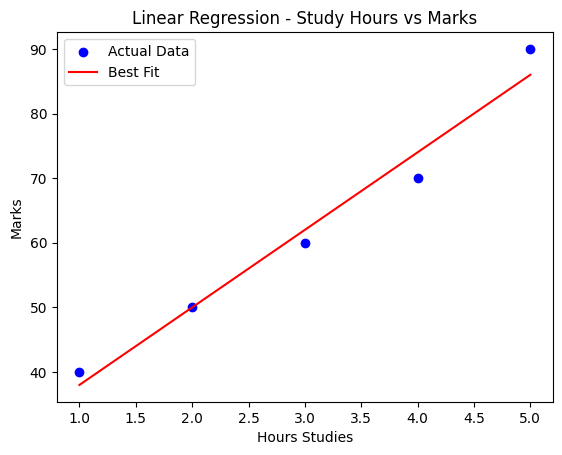

In [44]:
plt.scatter(df['Hours'], df['Marks'], color = 'blue', label = 'Actual Data')
plt.plot(df['Hours'], model.predict(x), color = 'red', label = 'Best Fit')
plt.xlabel("Hours Studies")
plt.ylabel("Marks")
plt.legend()
plt.title("Linear Regression - Study Hours vs Marks")
plt.show()

In [49]:
X = t[['age']]
Y = t['fare']

In [50]:
model = LinearRegression()
model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
# Y_pred = model.predict(X)
# accuracy = accuracy_score(Y, Y_pred)
# 
# print("Accuracy : ", accuracy)

In [61]:
new_data = pd.DataFrame({'age': [11]})
predicted_fare = model.predict(new_data)
print("Predicted Fare for 29 years of age:", predicted_fare)

Predicted Fare for 29 years of age: [23.88583796]


In [62]:
nba = pd.read_csv("nba.csv")
nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [65]:
def ConvertHeight(data):
  height = data.split("-")
  newHeightF = int (height[0]) * 30.48
  newHeightI = int(height[1]) * 2.54
  heightCm = newHeightF + newHeightI
  return heightCm

nba['HeightCm'] = nba.Height.apply(ConvertHeight)

In [84]:
def ConvertWeight(data):
  weightInKg = int(data) * 0.453592
  return weightInKg
nba['Weight_kg'] = nba.Weight.apply(ConvertWeight)

/tmp/ipykernel_12278/2820308503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['Weight_kg'] = nba.Weight.apply(ConvertWeight)


In [85]:
nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,HeightCm,Weight_kg
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,187.96,81.646560
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,198.12,106.594120
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,195.58,83.914520
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0,208.28,104.779752
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0,205.74,108.862080
...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0,208.28,106.140528
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0,190.50,92.079176
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0,185.42,81.192968
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0,220.98,116.119552


In [76]:
nba = nba.dropna(subset=['Salary'])

In [77]:
nba.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     82
Salary       0
HeightCm     0
dtype: int64

In [100]:
X_nba_Cm = nba[['HeightCm']]
Y_nba_Cm = nba['Salary']

In [101]:
model = LinearRegression()
model.fit(X_nba_Cm, Y_nba_Cm)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [102]:
new_data = pd.DataFrame({'HeightCm': [190]})
predicted_Cm = model.predict(new_data)
print("Predicted Salary for 190 Cm of Height:", predicted_Cm)

Predicted Salary for 190 Cm of Height: [4447537.71256226]


In [98]:
X_nba_Kg = nba[['Weight_kg']]
Y_nba_Kg = nba['Salary']
model = LinearRegression()
model.fit(X_nba_Kg, Y_nba_Kg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
new_data = pd.DataFrame({'Weight_kg': [100]})
predicted_Kg = model.predict(new_data)
print("Predicted Salary for 100 Kg of Weight:", predicted_Kg)

Predicted Salary for 100 Kg of Weight: [4806987.74099563]


In [96]:
X_nba_Year = nba[['Age']]
Y_nba_Year = nba['Salary']
model = LinearRegression()
model.fit(X_nba_Year, Y_nba_Year)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [97]:
new_data = pd.DataFrame({'Age': [50]})
predicted_Year = model.predict(new_data)
print("Predicted Salary for 50 Year of Age:", predicted_Year)

Predicted Salary for 50 Year of Age: [10699396.98238428]


In [103]:
X_nba = nba[['Age', "Weight_kg","HeightCm"]]
Y_nba = nba['Salary']
model = LinearRegression()
model.fit(X_nba, Y_nba)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [109]:
new_data = pd.DataFrame({
  'Age': [34], 
  'Weight_kg': [90],
  'HeightCm': [170]
})
predicted_Year = model.predict(new_data)
print("Predicted Salary :", predicted_Year)

Predicted Salary : [7788244.62226689]


/run/media/mahakal108/New Volume H/Skill's/Python/Data Science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


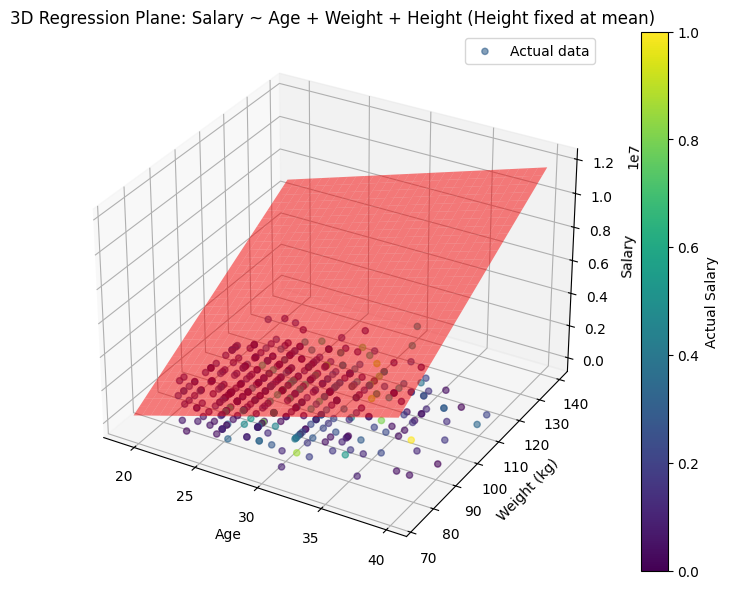

In [118]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D





# For plotting plane, choose two features for axes (e.g. Age, Weight) and fix the third (Height) at some constant value
# Or you can create a full surface by varying two and computing predictions

# Choose which two features to vary
feat1 = 'Age'
feat2 = 'Weight_kg'
# Fix feat3 at its mean (HeightCm)
fixed_height = nba_clean['HeightCm'].mean()

# Make a meshgrid over the ranges of feat1 and feat2
age_vals = np.linspace(nba_clean[feat1].min(), nba_clean[feat1].max(), 30)
weight_vals = np.linspace(nba_clean[feat2].min(), nba_clean[feat2].max(), 30)

Age_grid, Weight_grid = np.meshgrid(age_vals, weight_vals)

# Flatten grids to pass into model
# For each point in the grid, we need the same fixed height
Height_grid = np.full_like(Age_grid, fixed_height)

# Reshape into list of samples
grid_samples = np.column_stack((Age_grid.ravel(), Weight_grid.ravel(), Height_grid.ravel()))

# Predict salaries for grid
Salary_pred_grid = model.predict(grid_samples)
Salary_grid = Salary_pred_grid.reshape(Age_grid.shape)

# Now plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data
ax.scatter(nba_clean['Age'], nba_clean['Weight_kg'], nba_clean['HeightCm'], 
           c=nba_clean['Salary'], cmap='viridis', marker='o', alpha=0.6, label='Actual data')

# Plot the regression plane (over Age vs Weight_kg, at fixed height)
ax.plot_surface(Age_grid, Weight_grid, Salary_grid, color='red', alpha=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True)

ax.set_xlabel('Age')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Salary')
ax.set_title('3D Regression Plane: Salary ~ Age + Weight + Height (Height fixed at mean)')
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label='Actual Salary')

plt.legend()
plt.show()


KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
data = {
  'Height' : [160, 155, 170, 150],
  'Weight' : [60, 55, 70, 48],
  'Gender' : ['Male', 'Female', 'Male', 'Female']
}

In [121]:
df = pd.DataFrame(data)

In [122]:
df1 = df.copy()

In [123]:
df['Gender'] = df['Gender'].map({"Male" : 1, "Female" : 0})


In [124]:
X = df[['Height', 'Weight']]
Y = df['Gender']

In [129]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X,Y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [137]:
new_data = [[172, 78]]
prediction = model.predict(new_data)
print("Predicted Gender :", "Male" if prediction[0] == 1 else "Female")

Predicted Gender : Male


/run/media/mahakal108/New Volume H/Skill's/Python/Data Science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


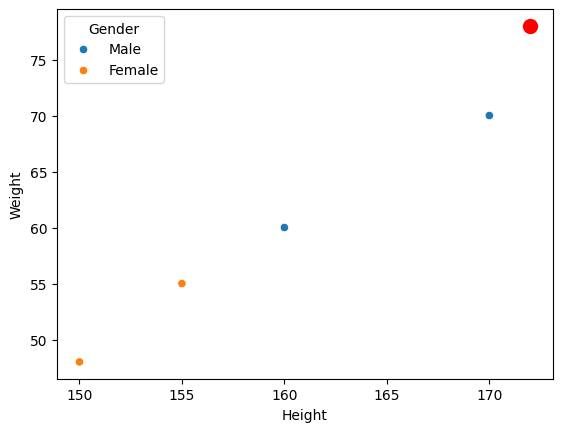

In [138]:
import seaborn as sns
sns.scatterplot(x = df1['Height'], y = df1['Weight'], hue = df1['Gender'])
plt.scatter(172, 78, color = 'red', s=100)
plt.show()

In [311]:
X = t[["pclass", "sex", "age", "sibsp", "parch",
    "fare", "embarked"]]
Y = t['survived']

In [376]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=62)



In [383]:
model = KNeighborsClassifier(n_neighbors =19)
model.fit(X_train, Y_train)

,n_neighbors,19
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [384]:

# Predict on test
Y_pred = model.predict(X_test)

# Compute accuracy

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc)

Accuracy: 0.7126865671641791


In [310]:
# new_data = [[17, 78]]
# prediction = model.predict(new_data)
# print("Predicted Survived :", "Survived" if prediction[0] == 1 else "Not Survived")

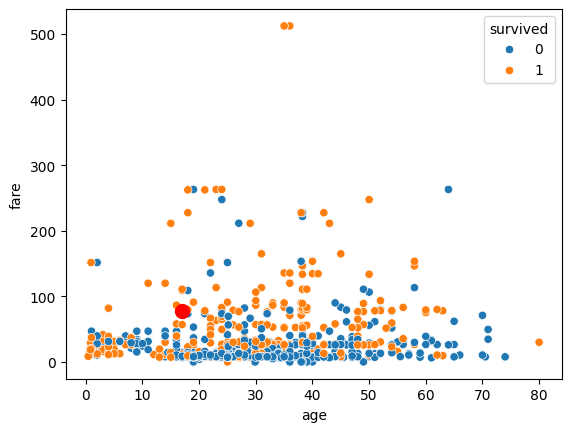

In [147]:
sns.scatterplot(x = t['age'], y = t['fare'], hue = t['survived'])
plt.scatter(17, 78, color = 'red', s=100)
plt.show()